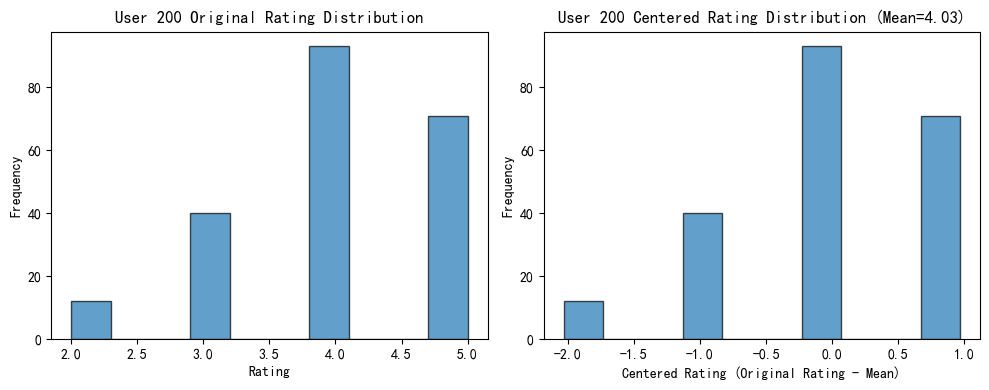

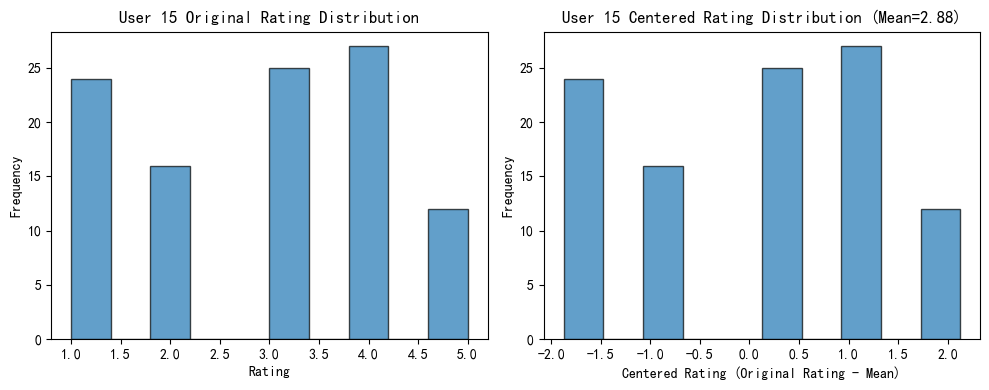

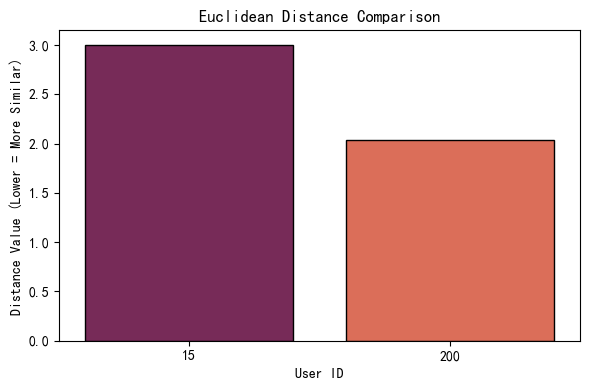

Cosine Similarity between User 200 and Movie 95: 0.00, Euclidean Distance: 2.03
Cosine Similarity between User 15 and Movie 95: 0.00, Euclidean Distance: 3.00


In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns
# Set Chinese font (resolve display issues for Chinese characters)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# Define column names
ratings_cols = ['user_id', 'item_id', 'rating', 'timestamp']
movies_cols = ['item_id', 'title', 'release_date', 'video_release_date', 
               'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
               'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 
               'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
               'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
# Load data (ensure file paths are correct)
ratings = pd.read_csv(r"C:\Users\22970\Downloads\ml-100k\ml-100k\u.data", 
                      sep='\t', names=ratings_cols, encoding='latin-1')
movies = pd.read_csv(r"C:\Users\22970\Downloads\ml-100k\ml-100k\u.item", 
                     sep='|', names=movies_cols, encoding='latin-1', engine='python')
# Create user-item rating matrix
user_item_matrix = ratings.pivot_table(index='user_id', columns='item_id', values='rating')
# Define function to center ratings
def center_ratings(user_id, matrix):
    user_ratings = matrix.loc[user_id].dropna()  # Get non-null ratings for user
    user_avg = user_ratings.mean()
    centered = user_ratings - user_avg  # Subtract average to center
    return centered
# Center ratings for users 200 and 15
user200_centered = center_ratings(200, user_item_matrix)
user15_centered = center_ratings(15, user_item_matrix)
# Prepare user profiles including movie 95
user200_profile = user200_centered.reindex(user200_centered.index.union([95])).fillna(0)
user15_profile = user15_centered.reindex(user15_centered.index.union([95])).fillna(0)
movie95_profile = user_item_matrix[95].dropna().reindex([95]).fillna(0)  # Movie 95's profile (only its own rating)
# Define cosine similarity function
def cosine_similarity(a, b):
    return 1 - cosine(a, b)  # Scipy's cosine returns distance; convert to similarity
# Define Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))
# Calculate similarity and distance
sim_user200 = cosine_similarity(user200_profile, movie95_profile)
sim_user15 = cosine_similarity(user15_profile, movie95_profile)
dist_user200 = euclidean_distance(user200_profile, movie95_profile)
dist_user15 = euclidean_distance(user15_profile, movie95_profile)
def plot_rating_distribution(user_id, centered_ratings, original_ratings):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    original_ratings.plot(kind='hist', bins=10, edgecolor='k', alpha=0.7)
    plt.title(f"User {user_id} Original Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.subplot(1, 2, 2)
    centered_ratings.plot(kind='hist', bins=10, edgecolor='k', alpha=0.7)
    plt.title(f"User {user_id} Centered Rating Distribution (Mean={original_ratings.mean():.2f})")
    plt.xlabel("Centered Rating (Original Rating - Mean)")
    plt.ylabel("Frequency")  
    plt.tight_layout()
    plt.show()
user200_original = user_item_matrix.loc[200].dropna()
user15_original = user_item_matrix.loc[15].dropna()
plot_rating_distribution(200, user200_centered, user200_original)
plot_rating_distribution(15, user15_centered, user15_original)
def plot_distance_comparison(dist_user200, dist_user15):
    data = {
        'User ID': [200, 15],
        'Euclidean Distance': [dist_user200, dist_user15]
    }
    df = pd.DataFrame(data)
    plt.figure(figsize=(6, 4))
    sns.barplot(x='User ID', y='Euclidean Distance', data=df, palette='rocket', edgecolor='k')
    plt.title("Euclidean Distance Comparison")
    plt.ylabel("Distance Value (Lower = More Similar)")
    plt.tight_layout()
    plt.show()
plot_distance_comparison(dist_user200, dist_user15)
print(f"Cosine Similarity between User 200 and Movie 95: {sim_user200:.2f}, Euclidean Distance: {dist_user200:.2f}")
print(f"Cosine Similarity between User 15 and Movie 95: {sim_user15:.2f}, Euclidean Distance: {dist_user15:.2f}")